# 搭建一个学生干预系统

In [61]:
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

from scipy.stats import skew

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split

%matplotlib inline

In [62]:
student_data = pd.read_csv('student-data.csv')
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [63]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [64]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [65]:
y_all = student_data['passed']
X_all = student_data.drop(['passed'], axis=1)
print X_all.shape
print y_all.shape

(395, 30)
(395,)


In [66]:
# 计算数值类数据的偏斜度
numeric_feats = X_all.dtypes[X_all.dtypes != 'object'].index
X_all[numeric_feats].apply(lambda x: skew(x.dropna()))

age           0.464498
Medu         -0.317170
Fedu         -0.031552
traveltime    1.600920
studytime     0.629739
failures      2.377951
famrel       -0.948263
freetime     -0.162730
goout         0.116060
Dalc          2.182434
Walc          0.609634
health       -0.492723
absences      3.657622
dtype: float64

可视化两个偏斜度有点大的特征

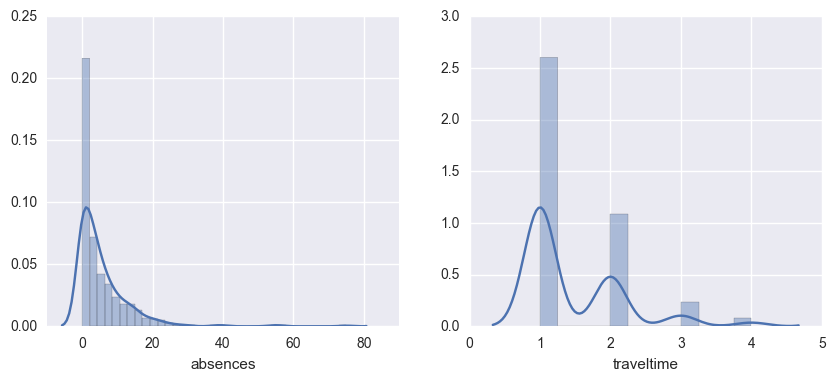

In [67]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.distplot(X_all['absences'])
plt.subplot(1, 2, 2)
sns.distplot(X_all['traveltime'])

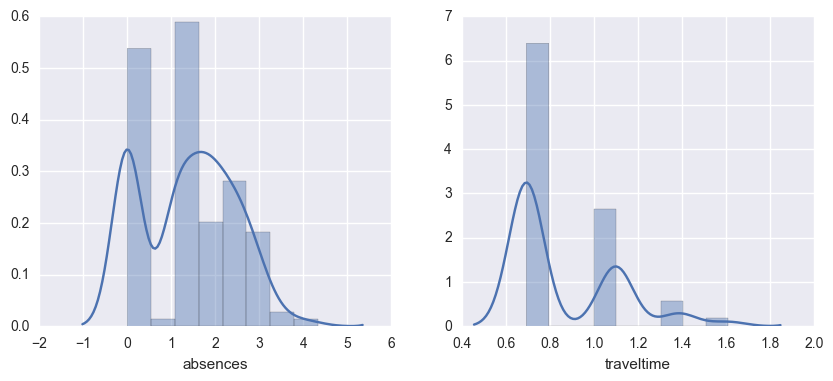

In [68]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.distplot(np.log1p(X_all['absences']))
plt.subplot(1, 2, 2)
sns.distplot(np.log1p(X_all['traveltime']))

In [69]:
# 对absences取log1p
X_all['absences'] = np.log1p(X_all['absences'])

In [70]:
# 独热处理
X_all = pd.get_dummies(X_all)
X_all.shape

(395, 56)

In [71]:
y_all = [1 if y == 'yes' else 0 for y in y_all]
y_all = np.array(y_all)
y_all

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1,

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, random_state = 10)
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(316, 56)
(316,)
(79, 56)
(79,)


In [75]:
print np.sum(y_all == 1)
print np.sum(y_all == 0)

265
130


In [90]:
def train_classifier(clf, X_train, y_train):
    ''' 用训练集训练分类器 '''
    
    # 开始计时，训练分类器，然后停止计时
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' 用训练好的分类器做预测并输出F1值'''
    
    # 开始计时，作出预测，然后停止计时
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # 输出并返回结果
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target, y_pred, pos_label=1)


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' 用一个分类器训练和预测，并输出F1值 '''
    
    # 输出分类器名称和训练集大小
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # 训练一个分类器
    train_classifier(clf, X_train, y_train)
    
    # 输出训练和测试的预测结果
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

## 训练和评价模型
在这个部分，你将选择3个适合这个问题并且在`scikit-learn`中已有的监督学习的模型。首先你需要说明你选择这三个模型的原因，包括这些数据集有哪些特点，每个模型的优点和缺点各是什么。然后，你需要将这些模型用不同大小的训练集（100个数据点，200个数据点，300个数据点）进行训练，并用F<sub>1</sub>的值来衡量。你需要制作三个表，每个表要显示训练集大小，训练时间，预测时间，训练集上的F<sub>1</sub>值和测试集上的F<sub>1</sub>值（每个模型一个表）。

**这是目前** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **里有的监督学习模型，你可以从中选择:**
- Gaussian Naive Bayes (GaussianNB) 朴素贝叶斯
- Decision Trees 决策树
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM) 向量模型机
- Logistic Regression 逻辑回归

In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [93]:
clf_A = LogisticRegression()
clf_B = SVC()
clf_C = RandomForestClassifier()

train_predict(clf_A, X_train, y_train, X_test, y_test)
train_predict(clf_B, X_train, y_train, X_test, y_test)
train_predict(clf_C, X_train, y_train, X_test, y_test)

Training a LogisticRegression using a training set size of 316. . .
Trained model in 0.0033 seconds
Made predictions in 0.0003 seconds.
F1 score for training set: 0.8304.
Made predictions in 0.0003 seconds.
F1 score for test set: 0.8276.
Training a SVC using a training set size of 316. . .
Trained model in 0.0128 seconds
Made predictions in 0.0071 seconds.
F1 score for training set: 0.8474.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.8160.
Training a RandomForestClassifier using a training set size of 316. . .
Trained model in 0.0581 seconds
Made predictions in 0.0064 seconds.
F1 score for training set: 0.9976.
Made predictions in 0.0034 seconds.
F1 score for test set: 0.7407.


接下来可以用网格搜索确定最优的参数